In [1]:
#Name: Dhinesh Kandra
#Registration Number:21BDS0030
#Course: EDA (BCSE331L)
#Digital Assignment:

#Question:
#Develop a model for the below dataset using Python Code.
 #Dataset Link: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Fishing.csv
 #Procedure to Follow:
 #1. Create a github account and from the personal Google Colab interface your account.
 #2. Load the Dataset and explore Dimension, Summary, Data Handling, Data Cleaning,
 #Univariate, Bivariate and Multivariate Analysis (Maximum of all the possibilities).
 #3. Complete your task in parallel align to the Theory Session (From Module 2 to Module 7)
 #4. To know more about the dataset attributes you can search in web

In [2]:
#Solution:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
#Load the CSV file into a DataFrame
df = pd.read_csv('/content/.config/Fishing.csv')

In [4]:
#Data Exploration and Overview
# Print the shape (dimensions) of the dataset
print(f"Dataset Dimensions: {df.shape}")

# Display the first few rows of the dataset
df.head()

# Get general information about the dataset
df.info()

# Get statistical summary of numerical columns
df.describe()

Dataset Dimensions: (1182, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1182 non-null   int64  
 1   mode      1182 non-null   object 
 2   price     1182 non-null   float64
 3   catch     1182 non-null   float64
 4   pbeach    1182 non-null   float64
 5   ppier     1182 non-null   float64
 6   pboat     1182 non-null   float64
 7   pcharter  1182 non-null   float64
 8   cbeach    1182 non-null   float64
 9   cpier     1182 non-null   float64
 10  cboat     1182 non-null   float64
 11  ccharter  1182 non-null   float64
 12  income    1182 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 120.2+ KB


,rownames,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,591.500000,52.081975,0.389368,103.422005,103.422005,55.256570,84.379244,0.241011,0.162224,0.171215,0.629368,4099.337054
std,341.358316,53.829970,0.560596,103.641042,103.641042,62.713444,63.544650,0.190752,0.160390,0.209789,0.706114,2461.964060
min,1.000000,1.290000,0.000200,1.290000,1.290000,2.290000,27.290000,0.067800,0.001400,0.000200,0.002100,416.666680
25%,296.250000,15.870000,0.036100,26.656500,26.656500,13.122000,42.896000,0.067800,0.050300,0.023300,0.021900,2083.333200
50%,591.500000,37.896000,0.164300,74.628000,74.628000,33.534000,61.607000,0.253700,0.078900,0.089700,0.421600,3749.999900
75%,886.750000,67.513000,0.533300,144.144000,144.144000,72.402000,102.774000,0.533300,0.149800,0.241300,1.026600,5416.666700
max,1182.000000,666.110000,2.310100,843.186000,843.186000,666.110000,691.110000,0.533300,0.452200,0.736900,2.310100,12499.998000


In [5]:
#Data Deduplication and Handling Missing Data
#Check for duplicate rows and remove them
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

#Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Fill missing values for numerical columns only
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())



Number of duplicate rows: 0
Missing values in each column:
 rownames    0
mode        0
price       0
catch       0
pbeach      0
ppier       0
pboat       0
pcharter    0
cbeach      0
cpier       0
cboat       0
ccharter    0
income      0
dtype: int64


In [6]:
#Data Transformation - Discretization and Binning
#Discretize 'income' into categories (Low, Medium, High)
income_bins = [0, 2000, 5000, 8000]
income_labels = ['Low', 'Medium', 'High']
df['income_category'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

#Alternatively: Discretize using KBinsDiscretizer (bins for price)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['price_binned'] = discretizer.fit_transform(df[['price']])

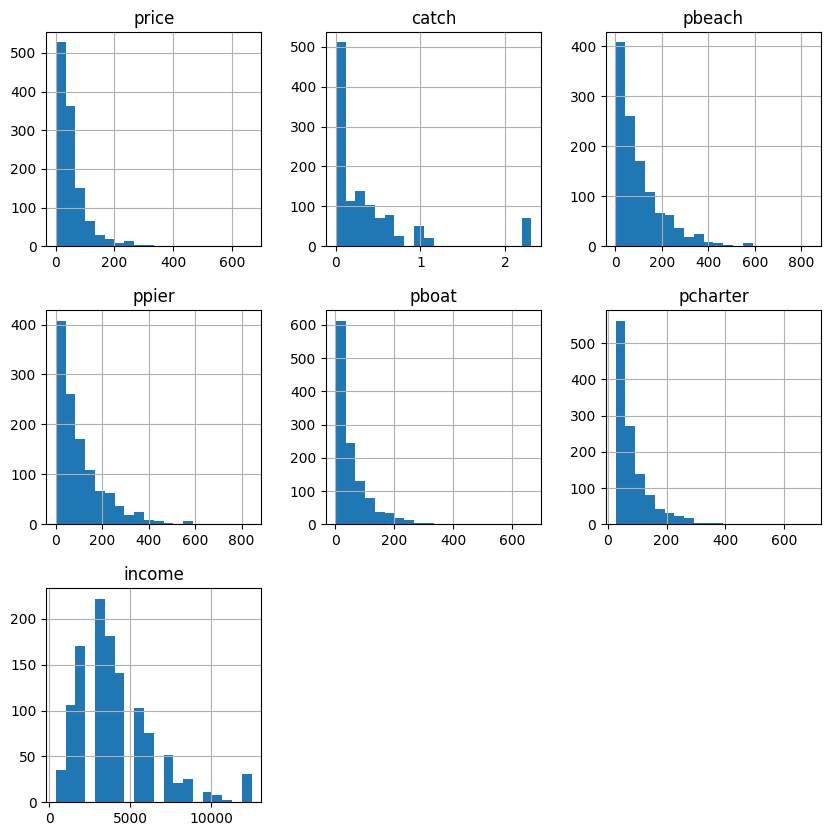

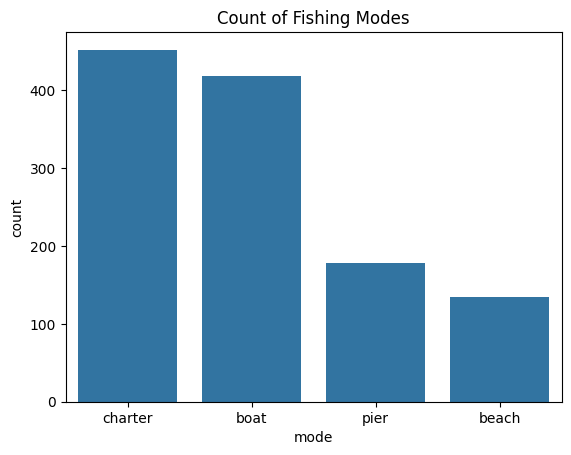

In [7]:
#Univariate Analysis
# Histograms for numerical columns
numerical_columns = ['price', 'catch', 'pbeach', 'ppier', 'pboat', 'pcharter', 'income']
df[numerical_columns].hist(figsize=(10, 10), bins=20)
plt.show()

#Countplot for the categorical variable 'mode'
sns.countplot(x='mode', data=df)
plt.title('Count of Fishing Modes')
plt.show()

Correlation Matrix:
               rownames     price     catch    pbeach     ppier     pboat  \
rownames      1.000000 -0.205256  0.311533 -0.098860 -0.098860  0.078949   
price        -0.205256  1.000000  0.106920  0.403692  0.403692  0.634315   
catch         0.311533  0.106920  1.000000 -0.026106 -0.026106 -0.005323   
pbeach       -0.098860  0.403692 -0.026106  1.000000  1.000000  0.111820   
ppier        -0.098860  0.403692 -0.026106  1.000000  1.000000  0.111820   
pboat         0.078949  0.634315 -0.005323  0.111820  0.111820  1.000000   
pcharter      0.073141  0.637275 -0.008625  0.141024  0.141024  0.996255   
cbeach        0.118603  0.034230  0.194224  0.331906  0.331906  0.213464   
cpier         0.126478  0.006900  0.163169  0.226081  0.226081  0.252776   
cboat         0.354635 -0.050906  0.743612 -0.098206 -0.098206 -0.041346   
ccharter      0.355020 -0.019656  0.789652 -0.027385 -0.027385 -0.022604   
income       -0.092054  0.315275 -0.082716  0.526819  0.526819  0.3

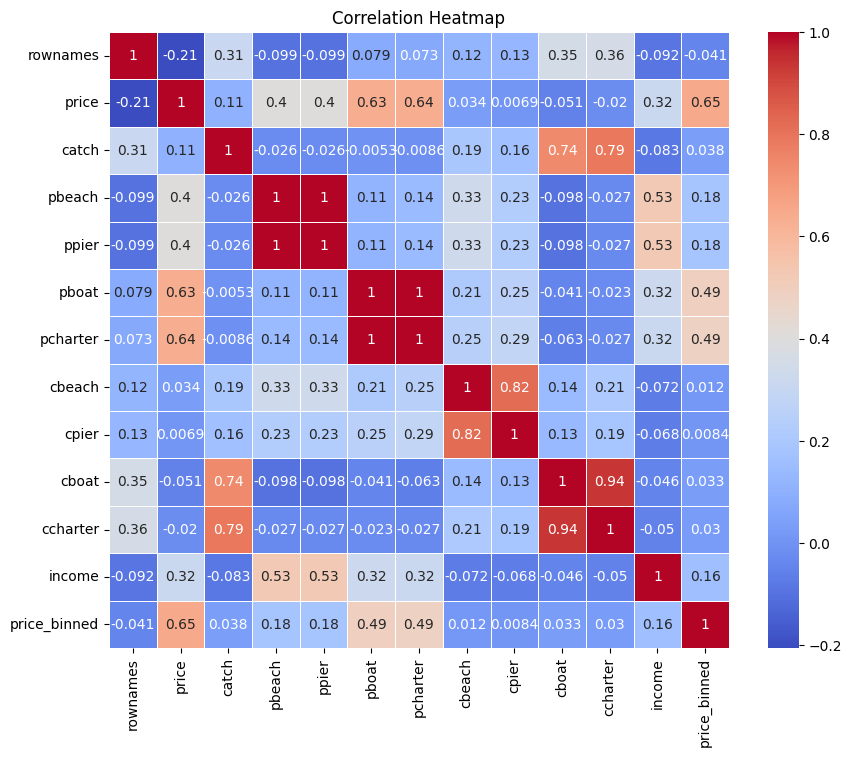

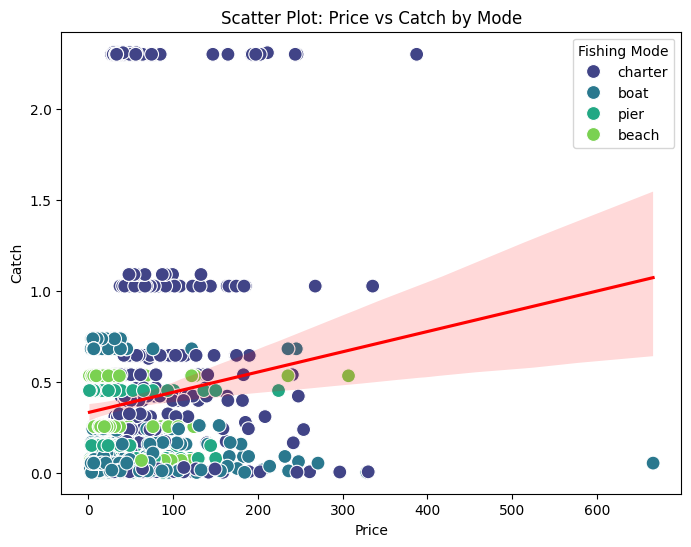

<ipython-input-8-82b1f2bd7572>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mode', y='income', data=df, palette='Set3')


Text(0, 0.5, 'Income')

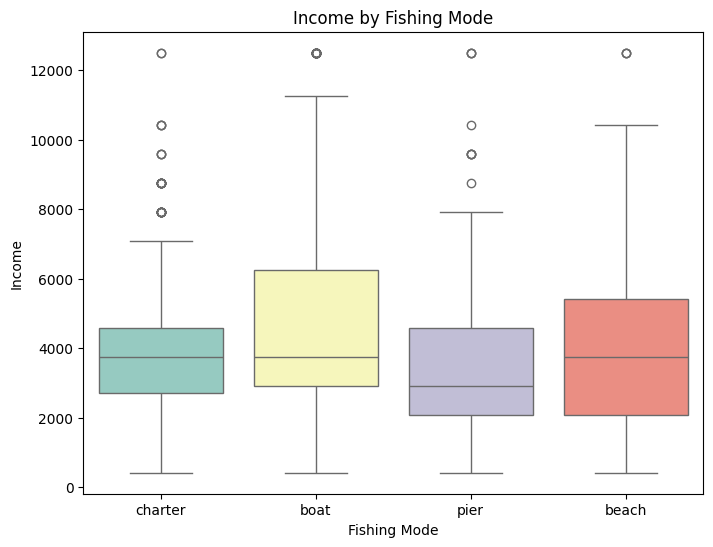

In [8]:
# Bivariate Analysis - Correlation and Relationships

# Calculate correlation between numerical columns
numerical_columns = df.select_dtypes(include=[np.number])
corr_matrix = numerical_columns.corr()
print("Correlation Matrix:\n", corr_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot between price and catch with a trendline
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='catch', hue='mode', data=df, palette='viridis', s=100)
sns.regplot(x='price', y='catch', data=df, scatter=False, color='red')  # Adding a trendline
plt.title('Scatter Plot: Price vs Catch by Mode')
plt.xlabel('Price')
plt.ylabel('Catch')
plt.legend(title='Fishing Mode')
plt.show()

# Boxplot to explore Income by Fishing Mode with additional statistical annotations
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='income', data=df, palette='Set3')
plt.title('Income by Fishing Mode')
plt.xlabel('Fishing Mode')
plt.ylabel('Income')

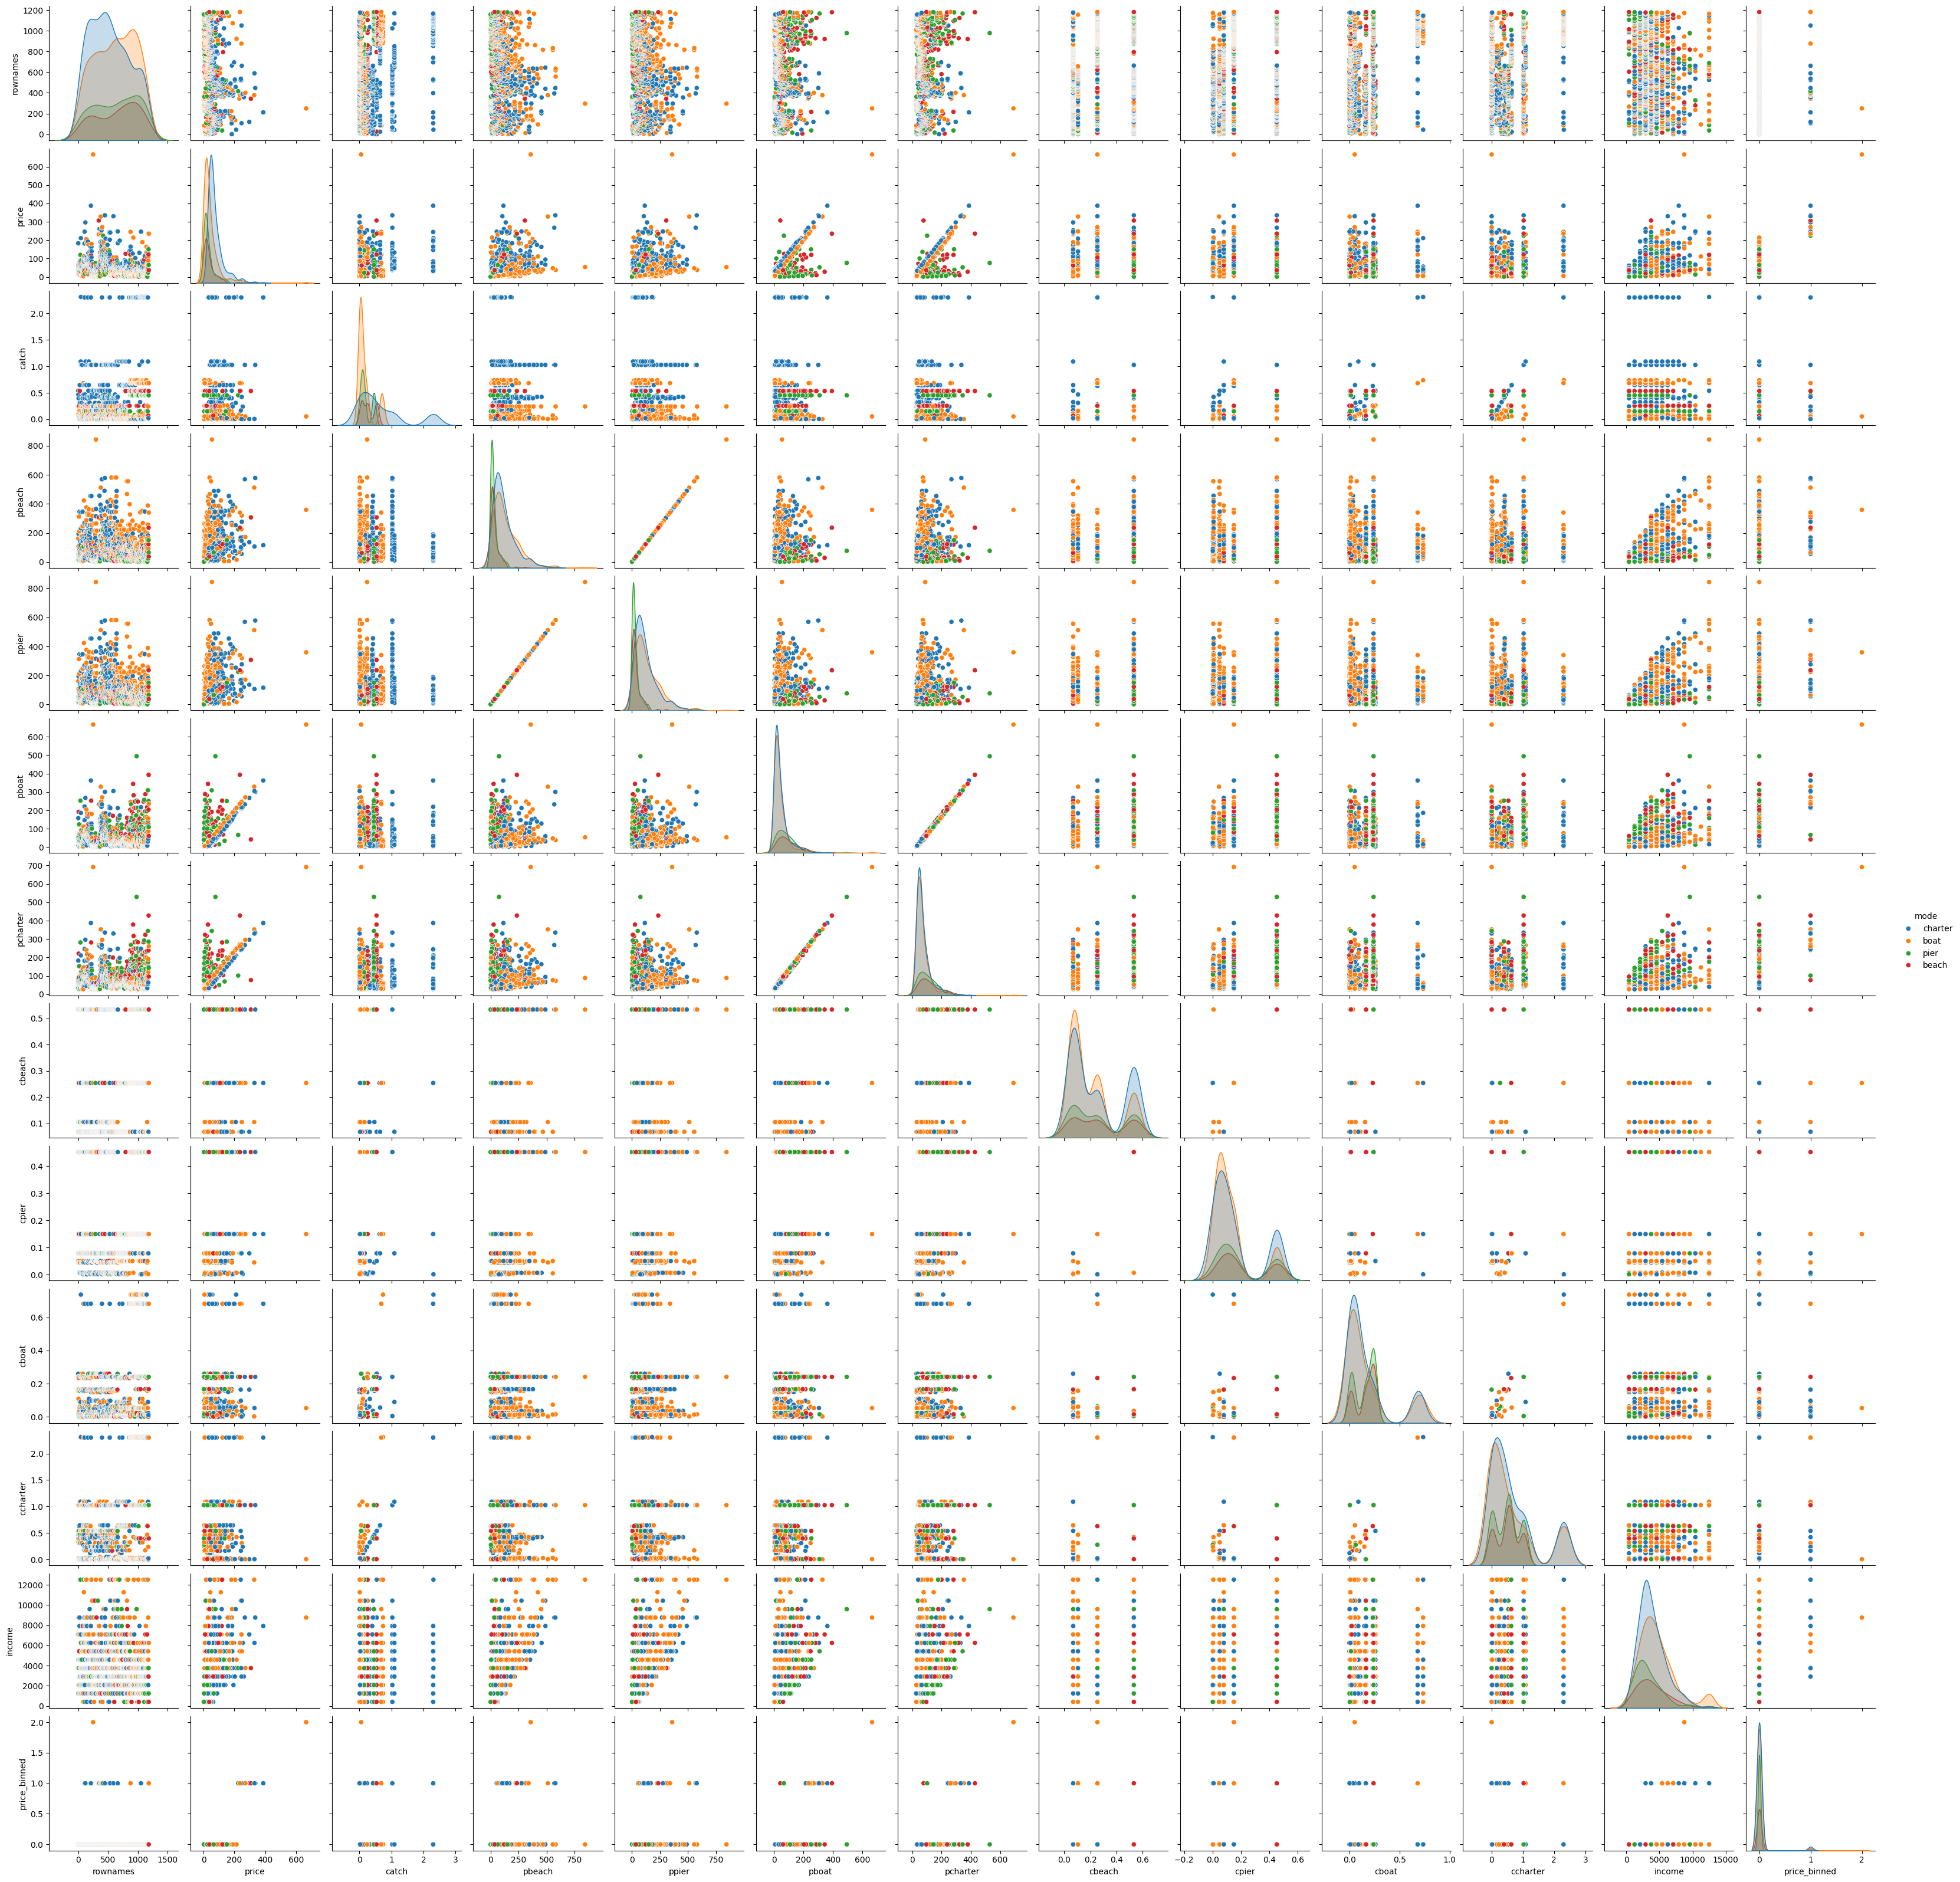

In [9]:
#Multivariate Analysis

# Pairplot to explore relationships between numerical variables

sns.pairplot(df, hue='mode')

plt.show()

In [12]:
#Data Summarization
#1D Statistical summary
print(df[['price', 'catch', 'income']].describe())

#2D Statistical summary using contingency tables (for categorical variables)
contingency_table = pd.crosstab(df['mode'], df['income_category'])
print("Contingency Table:\n", contingency_table)


             price        catch        income
count  1182.000000  1182.000000   1182.000000
mean     52.081975     0.389368   4099.337054
std      53.829970     0.560596   2461.964060
min       1.290000     0.000200    416.666680
25%      15.870000     0.036100   2083.333200
50%      37.896000     0.164300   3749.999900
75%      67.513000     0.533300   5416.666700
max     666.110000     2.310100  12499.998000
Contingency Table:
 income_category  Low  Medium  High
mode                              
beach             21      72    33
boat              37     238   101
charter           48     293    93
pier              35     111    23


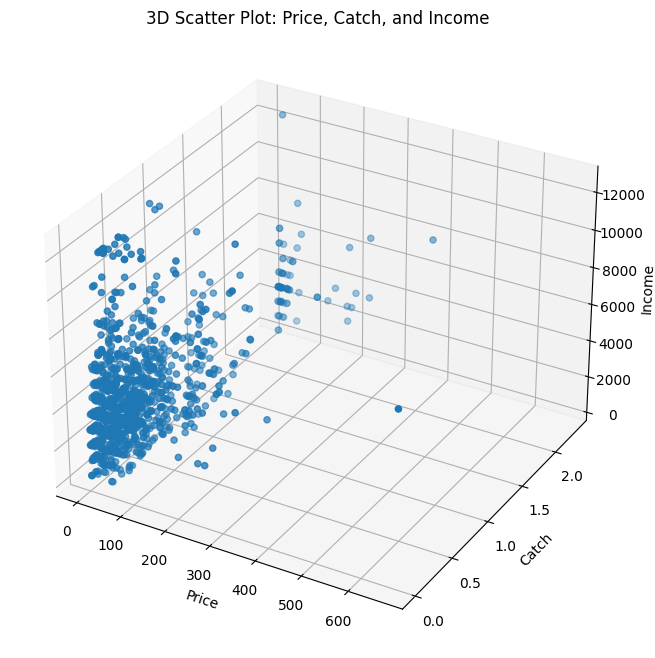

In [13]:
# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['price'], df['catch'], df['income'])

ax.set_xlabel('Price')
ax.set_ylabel('Catch')
ax.set_zlabel('Income')
plt.title('3D Scatter Plot: Price, Catch, and Income')

plt.show()

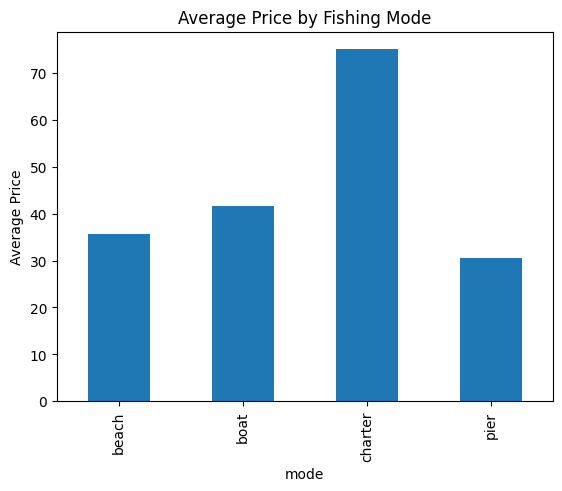

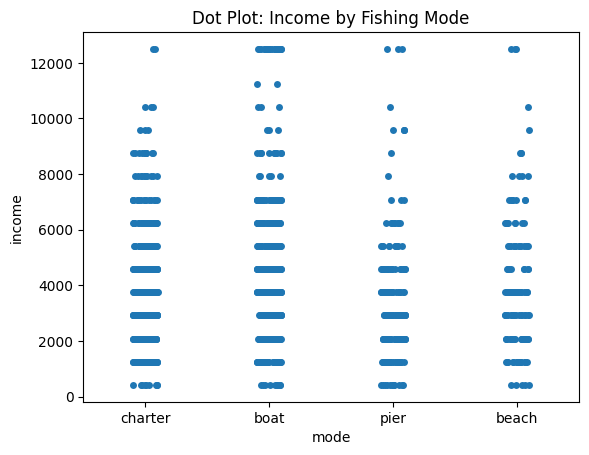

In [11]:
#Visualization - Bar Plots, Dot Charts
#Bar plot for average price by fishing mode
df.groupby('mode')['price'].mean().plot(kind='bar', title='Average Price by Fishing Mode')
plt.ylabel('Average Price')
plt.show()

#Dot plot (stripplot) for fishing modes
sns.stripplot(x='mode', y='income', data=df)
plt.title('Dot Plot: Income by Fishing Mode')
plt.show()